## Retail Case Study (Customer Segmentation)


1. Read and understand the dataset 
2. Handling Missing Values
3. Feature Engineering
4. Data Analysis and Visualization
5. Outlier Detection
6. Feature Scaling
7. Dimensionality Reduction
8. Clustering
9. Clusters Analysis and Customers Profiling

## 1. Read and understand the dataset

In [1]:
# handle data
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.cluster import KMeans

# evaluations
from sklearn.metrics import silhouette_score

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)


In [2]:
# read the dataset
purchase_df = pd.read_csv("CustomerPurchaseData.csv")
purchase_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10-12-2013,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08-08-2012,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15-06-2014,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09-09-2012,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,3,11,0.0


In [3]:
# basics of the dataset
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

## 2. Handling Missing Values

In [4]:
# missing values
round(100*(purchase_df.isnull().sum())/len(purchase_df), 2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 0.04
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntSnacksProds         0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               1.03
dtype: float64

In [5]:
# missing values in the ‘Income’ column imputed with 0
purchase_df["Income"].fillna(0,inplace = True)

In [6]:
# Replace missing values in the 'response' column based on campaign columns
purchase_df['Response'] = purchase_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].max(axis=1).fillna(0).astype(int)

In [7]:
# Verify missing values
round(100*(purchase_df.isnull().sum())/len(purchase_df), 2)

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntSnacksProds         0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [8]:
# let's find if we have duplicate rows.
purchase_df.duplicated().sum()

0

# 3.Feature Engineering

In [9]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [10]:
# Dt_Customer column indicates not in DateTime dtype.

purchase_df['Dt_Customer'] = pd.to_datetime(purchase_df['Dt_Customer'])

In [11]:
print("The newest customer's enrolment date in the records:", max(purchase_df['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(purchase_df['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


In [12]:
# Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
purchase_df['Age'] = 2015 - purchase_df['Year_Birth']

In [13]:
# Create feature 'Amount' indicating the Total amount of transactions (revenue contributed) over the span of two years.
purchase_df['Amount'] = purchase_df['MntWines'] +purchase_df['MntFruits'] + purchase_df['MntMeatProducts'] + purchase_df['MntFishProducts'] + purchase_df['MntSweetProducts'] + purchase_df['MntSnacksProds']

In [14]:
# Create feature 'Frequency' indicating the toal purchase  over the span of two years.
purchase_df['Frequency'] = purchase_df['NumWebPurchases'] + purchase_df['NumStorePurchases'] + purchase_df['NumCatalogPurchases'] 

In [15]:
purchase_df.Marital_Status.unique()

array(['Married', 'Together', 'Divorced', 'Single', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
# Create another feature "Living_status" out of "Marital_Status" to extract the living situation of couples.
purchase_df['Living_status'] = purchase_df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [17]:
# Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
purchase_df['Children'] = purchase_df['Kidhome'] + purchase_df['Teenhome']

In [18]:
# To get further clarity of household, Creating feature indicating "Family_Size"
purchase_df['Family_Size'] = purchase_df['Living_status'].replace({'Alone': 1, 'Partner':2}) + purchase_df['Children']

In [19]:
# Create a feature "Parent" to indicate parenthood status.
purchase_df["Parent"] = np.where(purchase_df.Children > 0, 1, 0)

In [20]:
unique_col = []

for col in purchase_df.columns:
    if purchase_df[col].nunique() == 1:
        unique_col.append(col)
unique_col

['Z_CostContact', 'Z_Revenue']

In [21]:
purchase_df.Education.unique()

array(['Basic', 'Cycle', 'Graduation', 'Master', 'PhD'], dtype=object)

In [22]:
# Segmenting education levels in three groups.
purchase_df['Education'] = purchase_df['Education'].replace({'Basic':'Undergraduate', 'Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [23]:
# Dropping some of the redundant features
drop_col = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
purchase_df = purchase_df.drop(drop_col, axis=1)

In [24]:
purchase_df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntSnacksProds           int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int32
Age                      int64
Amount                   int64
Frequency                int64
Living_status           object
Children                 int64
Family_Size              int64
Parent                   int32
dtype: object

# 4. Data Analysis and Visualization

In [25]:
purchase_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount,Frequency,Living_status,Children,Family_Size,Parent
0,Undergraduate,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,39,61,5,Partner,0,2,0
1,Undergraduate,24594.0,1,0,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0,36,29,4,Partner,1,3,1
2,Undergraduate,9548.0,1,0,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0,39,29,4,Alone,1,2,1
3,Undergraduate,28249.0,0,0,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0,54,43,5,Partner,0,2,0
4,Undergraduate,24882.0,1,0,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,1,37,80,4,Partner,1,3,1


In [26]:
purchase_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount,Frequency,Children,Family_Size,Parent
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,51412.799464,0.443502,0.500223,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,0.206789,46.197856,606.041090,12.539527,0.943725,2.588209,0.712818
std,22069.566611,0.537513,0.543772,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.405093,11.985494,602.274089,7.206400,0.748221,0.905333,0.452548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,34716.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,6.000000,0.000000,2.000000,0.000000
50%,51039.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.000000,12.000000,1.000000,3.000000,1.000000
75%,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1046.000000,18.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,32.000000,3.000000,5.000000,1.000000


In [27]:
purchase_df.describe(include=object).T
     

,count,unique,top,freq
Education,2239,3,Graduate,1126
Living_status,2239,2,Partner,1443


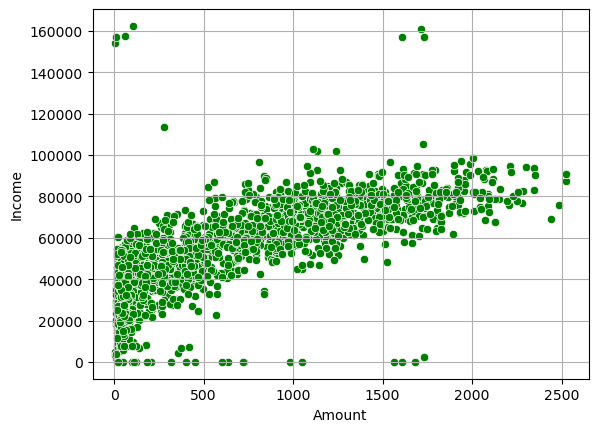

In [28]:
sns.scatterplot(x=purchase_df['Amount'], y=purchase_df['Income'], color='g')
plt.grid(True)

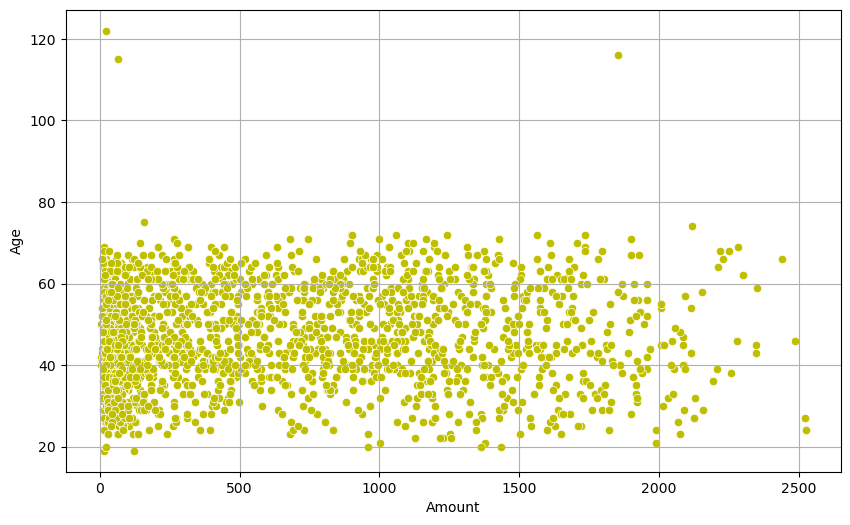

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=purchase_df['Amount'], y=purchase_df['Age'],color='y')
plt.grid(True)

<Axes: xlabel='Amount', ylabel='Count'>

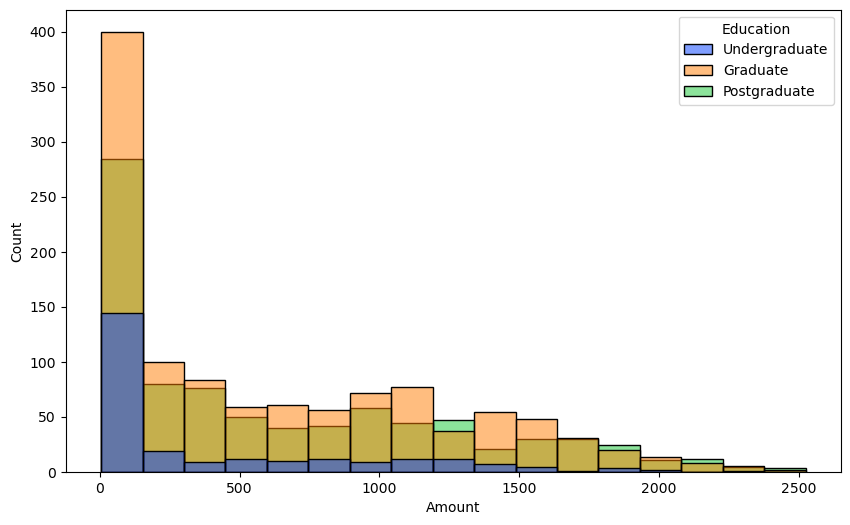

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(x=purchase_df['Amount'], hue=purchase_df['Education'],palette="bright")

<Axes: ylabel='Education'>

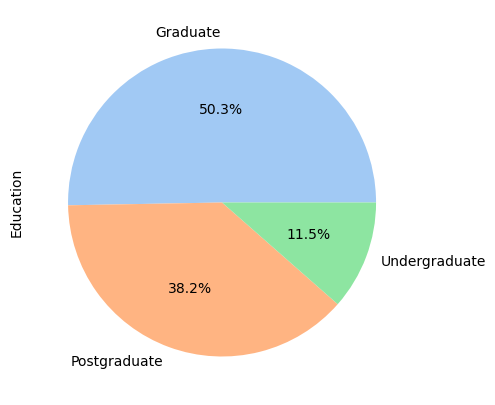

In [31]:
purchase_df['Education'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5), colors=sns.color_palette('pastel'))

# 5. Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x223b2e6f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x223b2ec26d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x223b2ec03d0>],
 'medians': [<matplotlib.lines.Line2D at 0x223b2ec3cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x223b2e9fbd0>],
 'means': []}

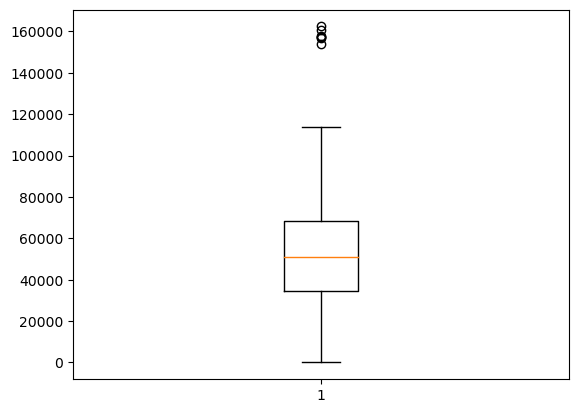

In [32]:
# 1. outlier treatment
plt.boxplot(purchase_df['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x223b2896490>,
 'caps': [<matplotlib.lines.Line2D at 0x223b2897c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x223b2895a50>],
 'medians': [<matplotlib.lines.Line2D at 0x223b28a1290>],
 'fliers': [<matplotlib.lines.Line2D at 0x223b2e4d0d0>],
 'means': []}

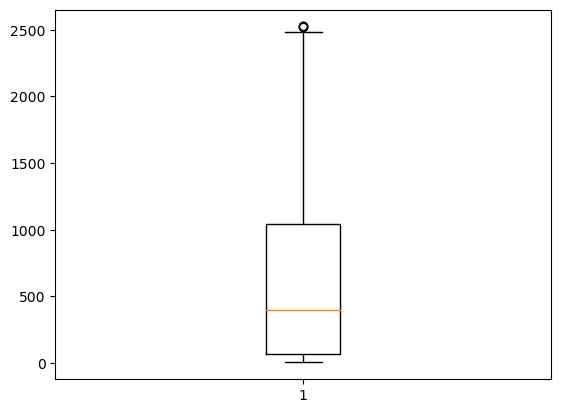

In [33]:
# 1. outlier treatment
plt.boxplot(purchase_df['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x223b28d9910>,
 'caps': [<matplotlib.lines.Line2D at 0x223b28fb250>,
 'boxes': [<matplotlib.lines.Line2D at 0x223b28f9450>],
 'medians': [<matplotlib.lines.Line2D at 0x223b2904710>],
 'fliers': [<matplotlib.lines.Line2D at 0x223b2edae90>],
 'means': []}

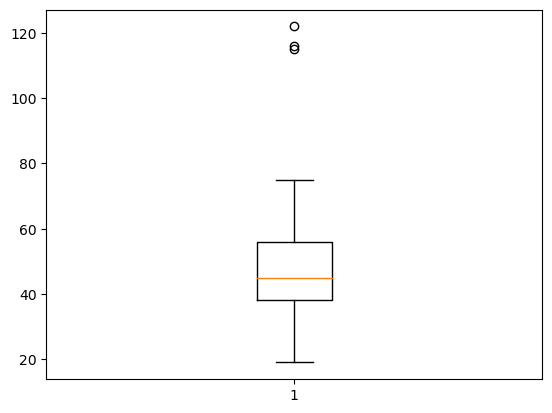

In [34]:
plt.boxplot(purchase_df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x223b272c690>,
 'caps': [<matplotlib.lines.Line2D at 0x223b272dd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x223b271bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x223b272f350>],
 'fliers': [<matplotlib.lines.Line2D at 0x223b272d210>],
 'means': []}

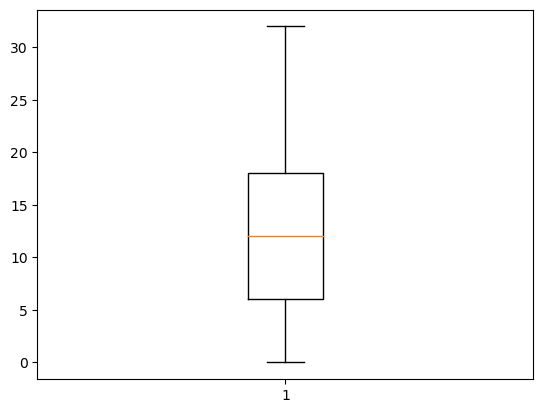

In [35]:
plt.boxplot(purchase_df['Frequency'])

In [36]:
# removing outliers
# outlier treatment for Amount
Q1 = purchase_df.Amount.quantile(0.05)
Q3 = purchase_df.Amount.quantile(0.95)
IQR = Q3 - Q1
purchase_df = purchase_df[(purchase_df.Amount >= Q1 - 1.5*IQR) & (purchase_df.Amount <= Q3 + 1.5*IQR)]

# outlier treatment for Income
Q1 = purchase_df.Income.quantile(0.05)
Q3 = purchase_df.Income.quantile(0.95)
IQR = Q3 - Q1
purchase_df= purchase_df[(purchase_df.Income >= Q1 - 1.5*IQR) & (purchase_df.Income <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
Q1 = purchase_df.Frequency.quantile(0.05)
Q3 = purchase_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
purchase_df= purchase_df[(purchase_df.Frequency >= Q1 - 1.5*IQR) & (purchase_df.Frequency <= Q3 + 1.5*IQR)]


# We will replace some of the outlier points from Age with 100
age_limit= 100

# Replace the outliers with the maximum age allowed
purchase_df['Age'] = purchase_df['Age'].apply(lambda x: x if x <= age_limit else age_limit)

In [37]:
purchase_df.shape

(2239, 30)

### Categorical Variable Encoding


In [38]:
categorical = [var for var in purchase_df.columns if purchase_df[var].dtype=='object']
categorical

['Education', 'Living_status']

In [39]:
#Since the education is a ordinal variable, we will encode it with ordinal numbers.
purchase_df['Education'] =purchase_df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [40]:
purchase_df['Living_status'] = purchase_df['Living_status'].map({'Alone':0,'Partner':1})

In [41]:
purchase_df.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntSnacksProds           int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int32
Age                      int64
Amount                   int64
Frequency                int64
Living_status            int64
Children                 int64
Family_Size              int64
Parent                   int32
dtype: object

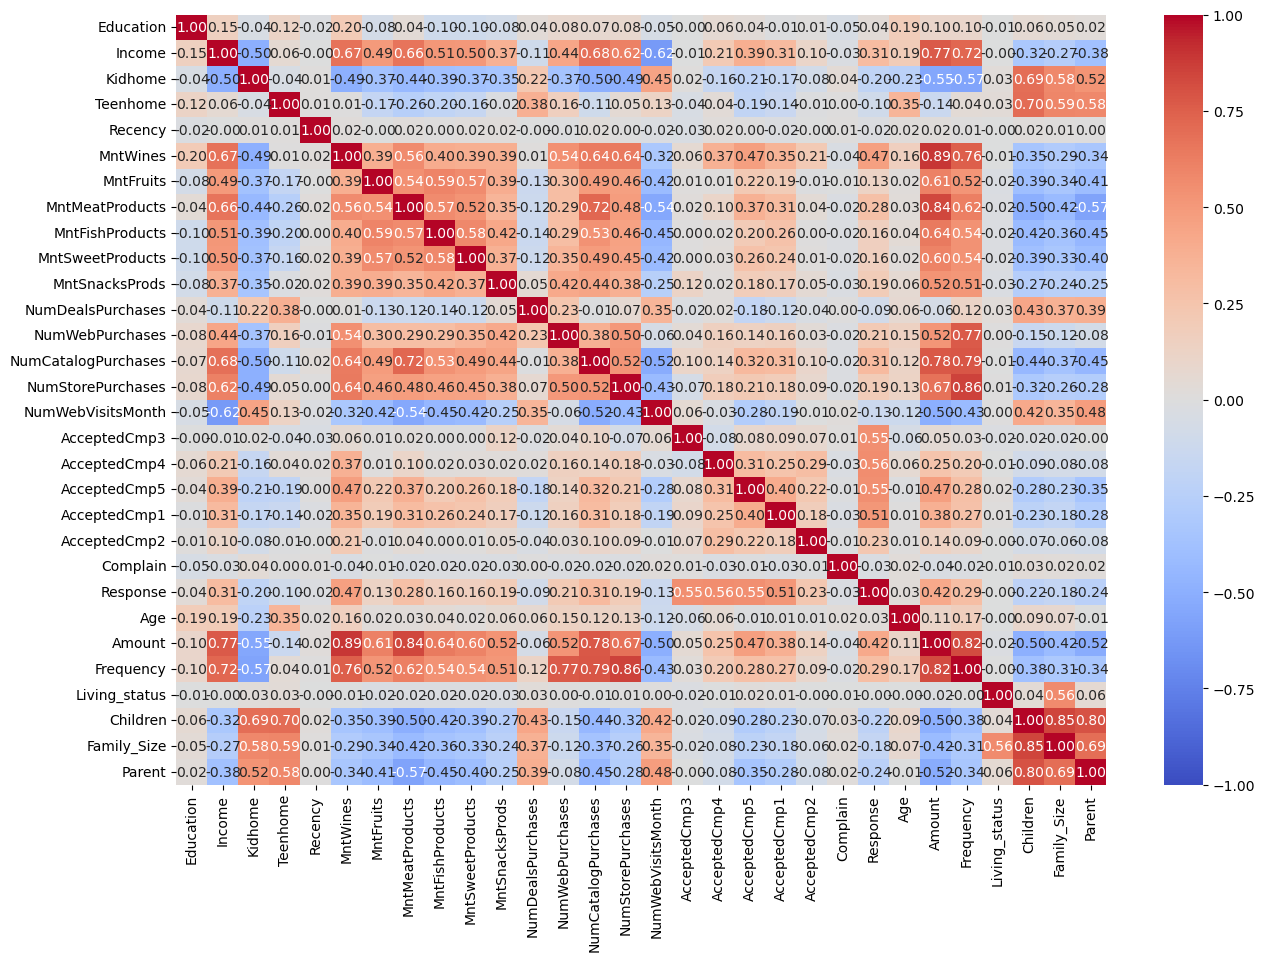

In [42]:
# Let's see the correlation matrix 
correlation_matrix = purchase_df.corr()
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()


In [43]:
# Filter highly correlated features
highly_corr = correlation_matrix.unstack().sort_values(ascending=False)
highly_corr= highly_corr[(highly_corr > 0.5) & (highly_corr < 1.0)].reset_index()
highly_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("Highly Correlated Features:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(highly_corr)

Highly Correlated Features:
               Feature 1            Feature 2  Correlation
0                 Amount             MntWines     0.891800
1               MntWines               Amount     0.891800
2              Frequency    NumStorePurchases     0.855413
3      NumStorePurchases            Frequency     0.855413
4            Family_Size             Children     0.849022
5               Children          Family_Size     0.849022
6                 Amount      MntMeatProducts     0.842934
7        MntMeatProducts               Amount     0.842934
8                 Amount            Frequency     0.820634
9              Frequency               Amount     0.820634
10              Children               Parent     0.800759
11                Parent             Children     0.800759
12             Frequency  NumCatalogPurchases     0.785574
13   NumCatalogPurchases            Frequency     0.785574
14   NumCatalogPurchases               Amount     0.778546
15                Amount  Nu

### Inferences:
i.Customers who spend more on wines ('MntWines') tend to have higher overall spending ('Amount').    
ii.Frequent  purchasers ('Frequency') also show higher purchase frequency at physical stores ('NumStorePurchases').  
iii.There is a strong correlation between spending on meat products ('MntMeatProducts') and overall spending ('Amount').  
iv.Customers who make more frequent online purchases ('Frequency') tend to have higher overall spending ('Amount').  

In [44]:
# Filter medium correlated features
medium_corr = correlation_matrix.unstack().sort_values(ascending=False)
medium_corr = medium_corr[(medium_corr >= 0.3) & (medium_corr <= 0.5)].reset_index()
medium_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nMedium Correlated Features:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(medium_corr)


Medium Correlated Features:
              Feature 1            Feature 2  Correlation
0             MntFruits               Income     0.493553
1                Income            MntFruits     0.493553
2      MntSweetProducts  NumCatalogPurchases     0.490843
3   NumCatalogPurchases     MntSweetProducts     0.490843
4   NumCatalogPurchases            MntFruits     0.487884
5             MntFruits  NumCatalogPurchases     0.487884
6       MntMeatProducts    NumStorePurchases     0.479531
7     NumStorePurchases      MntMeatProducts     0.479531
8                Parent    NumWebVisitsMonth     0.476900
9     NumWebVisitsMonth               Parent     0.476900
10             MntWines         AcceptedCmp5     0.472593
11         AcceptedCmp5             MntWines     0.472593
12               Amount         AcceptedCmp5     0.470039
13         AcceptedCmp5               Amount     0.470039
14             Response             MntWines     0.466097
15             MntWines             Respons

### Inferences:
i. Customers with higher incomes tend to spend more on fruits.  
ii.Customers who make more catalog purchases also tend to spend more on fruits and sweet products.    
iii.Customers who make more store purchases may also spend more on meat products.      
iv.Parents visit the website more frequently than non-parents.    
v.Customers who have accepted the fifth marketing campaign show a positive correlation with spending on wines.    
vi.Customers who spend more may be more receptive to the fifth marketing campaign.  

## 6. Feature Scaling

In [45]:
purchase_df_old =purchase_df.copy()


In [46]:
# creating a subset of dataframe by dropping binary features.
cols_del = ['Education','Living_status','Complain','Response','Parent','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']                    
purchase_df_cols_del=purchase_df.loc[:,cols_del]
purchase_df = purchase_df.drop(cols_del, axis=1)

In [47]:
purchase_df_cols_del.head()

,Education,Living_status,Complain,Response,Parent,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,0,0,0,0


In [48]:
all_colms = purchase_df.columns
scaler = StandardScaler()
purchase_df[all_colms] = scaler.fit_transform(purchase_df[all_colms])

In [49]:
purchase_df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Amount,Frequency,Children,Family_Size
0,-1.990189,-0.825284,-0.920119,0.341157,-0.885683,-0.259167,-0.691276,-0.485829,-0.631700,-0.537472,-0.685461,-0.750483,-0.911015,-0.858788,1.105986,-0.605014,-0.905174,-1.046460,-1.261574,-0.649861
1,-1.215465,1.035553,-0.920119,1.549838,-0.900540,-0.586025,-0.713430,-0.504136,-0.655927,-0.671667,-0.685461,-1.110374,-0.911015,-0.858788,-0.130311,-0.858011,-0.958318,-1.185257,0.075229,0.454952
2,-1.897371,1.035553,-0.920119,-0.625787,-0.903511,-0.636311,-0.726723,-0.504136,-0.510567,-0.671667,-0.167840,-1.110374,-0.911015,-0.858788,1.105986,-0.605014,-0.958318,-1.185257,0.075229,-0.649861


In [50]:
purchase_df=pd.concat([purchase_df, purchase_df_cols_del], axis=1)

## 7. Dimensionality Reduction

In [51]:
from sklearn.decomposition import PCA
p = PCA(n_components=3)
p.fit(purchase_df)

PCA(n_components=3)

In [52]:
W = p.components_.T
W

array([[ 2.74155605e-01,  1.23569710e-01, -1.78554562e-01],
       [-2.37511362e-01,  5.24191718e-02,  3.25689526e-01],
       [-6.86501568e-02,  4.83787411e-01, -2.81230843e-01],
       [ 3.36962744e-03,  1.20167203e-02, -2.92013689e-02],
       [ 2.62468400e-01,  1.65140231e-01, -1.33534038e-02],
       [ 2.32262565e-01, -4.14042856e-02,  1.55847739e-01],
       [ 2.74135750e-01, -5.22960625e-02,  3.79779811e-02],
       [ 2.41333522e-01, -5.25677586e-02,  1.39226002e-01],
       [ 2.31485903e-01, -2.81533020e-02,  1.58776793e-01],
       [ 1.91135599e-01,  9.20771077e-02,  2.26917675e-01],
       [-5.35410346e-02,  3.90607526e-01,  3.45946421e-01],
       [ 1.86447258e-01,  2.85438148e-01,  2.10445334e-01],
       [ 2.78213102e-01,  5.88124604e-02, -2.97046025e-03],
       [ 2.52305526e-01,  1.75224954e-01,  1.22286047e-02],
       [-2.14060851e-01,  1.09435347e-01,  3.46615951e-01],
       [ 4.38141354e-02,  2.26699645e-01, -5.78185742e-01],
       [ 3.19107906e-01,  7.12393159e-02

In [53]:
pd.DataFrame(W, index=purchase_df.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Income,0.274156,0.123570,-0.178555
Kidhome,-0.237511,0.052419,0.325690
Teenhome,-0.068650,0.483787,-0.281231
Recency,0.003370,0.012017,-0.029201
MntWines,0.262468,0.165140,-0.013353
MntFruits,0.232263,-0.041404,0.155848
MntMeatProducts,0.274136,-0.052296,0.037978
MntFishProducts,0.241334,-0.052568,0.139226
MntSweetProducts,0.231486,-0.028153,0.158777
MntSnacksProds,0.191136,0.092077,0.226918


In [54]:
p.explained_variance_

array([8.617069  , 2.79650317, 1.28535764])

In [55]:
p.explained_variance_ratio_

array([0.40418493, 0.13117041, 0.0602899 ])

In [56]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.404185
2,0.131170
3,0.060290


In [57]:
p.explained_variance_ratio_.cumsum()

array([0.40418493, 0.53535534, 0.59564523])

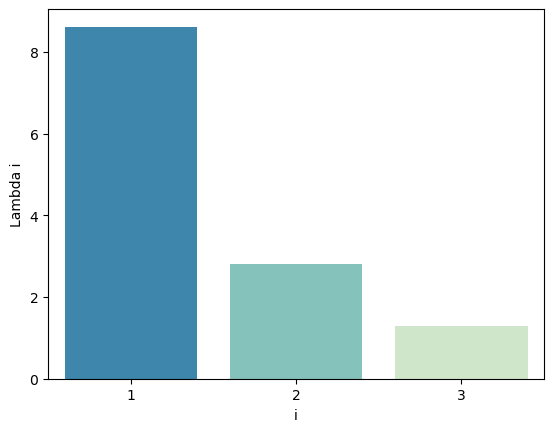

In [58]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [59]:
purchase_df_PCA = pd.DataFrame(p.transform(purchase_df), columns=(['col1', 'col2', 'col3']))

In [60]:
purchase_df_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2239.0,1.205923e-16,2.935484,-5.955006,-2.672420,-0.715903,2.609400,7.616028
col2,2239.0,-3.808179e-17,1.672275,-3.940315,-1.352570,-0.190589,1.212112,6.323635
col3,2239.0,7.616358e-17,1.133738,-4.329643,-0.786059,0.023504,0.734549,4.685370


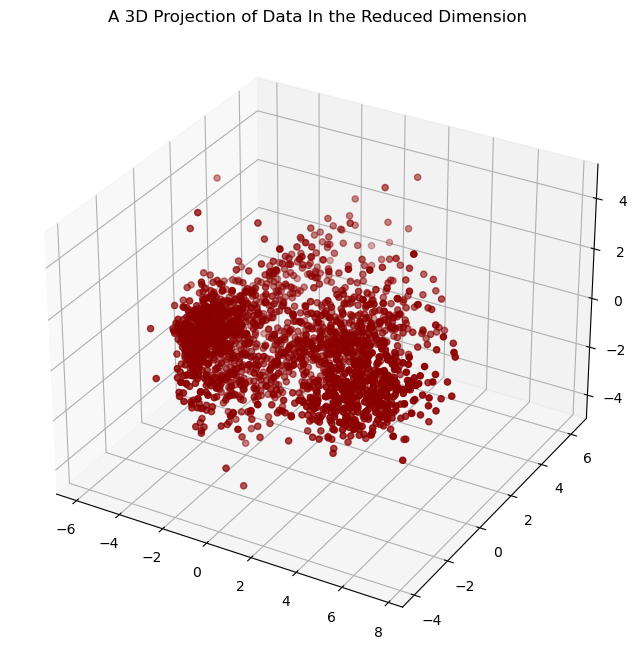

In [61]:
x = purchase_df_PCA['col1']
y = purchase_df_PCA['col2']
z = purchase_df_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

## 8. Cluster Modelling

In [62]:
#k-means with some arbitrary k
kmeans = KMeans(n_clusters=4 ,max_iter=50)
kmeans.fit(purchase_df_PCA)

KMeans(max_iter=50, n_clusters=4)

In [63]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
#Adding the Clusters feature to the datafame.
purchase_df_PCA['Cluster_id'] = kmeans.labels_

### Finding the Optimal Number of Clusters
### SSD

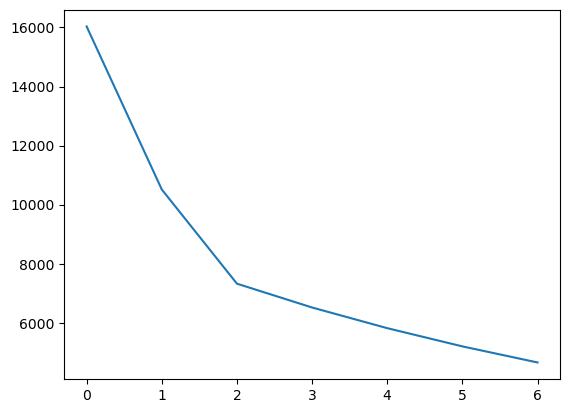

In [65]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(purchase_df_PCA)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [66]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(purchase_df_PCA)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(purchase_df_PCA, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4290726941999694
For n_clusters=3, the silhouette score is 0.45212183156952435
For n_clusters=4, the silhouette score is 0.46591934093994525
For n_clusters=5, the silhouette score is 0.44378264039060544
For n_clusters=6, the silhouette score is 0.4238284388047233
For n_clusters=7, the silhouette score is 0.39732377510011624
For n_clusters=8, the silhouette score is 0.363135948216587


In [67]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(purchase_df_PCA)

KMeans(max_iter=50, n_clusters=4)

In [68]:
kmeans.labels_

array([0, 0, 0, ..., 2, 0, 0])

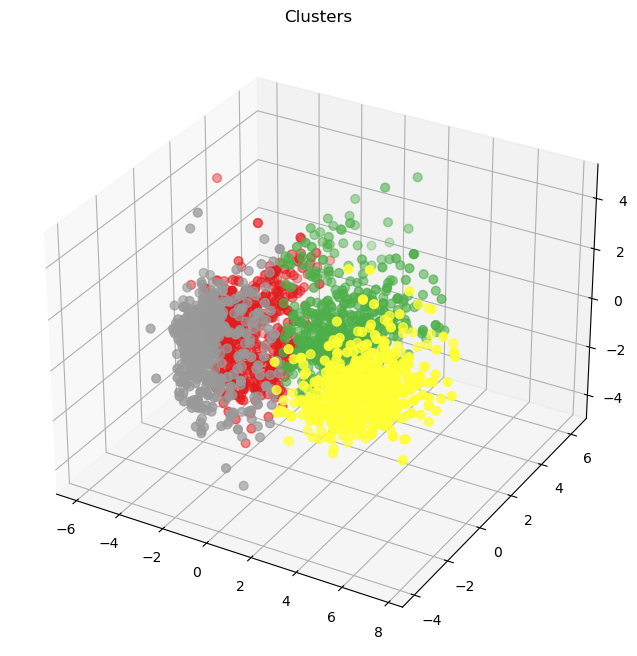

In [69]:
# Create a 2D scatter plot with different colors for each cluster
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=purchase_df_PCA['Cluster_id'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

In [70]:
# Assining cluster lable to datafarame 
purchase_df_old['cluster_id'] = kmeans.labels_
purchase_df_old.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Amount,Frequency,Living_status,Children,Family_Size,Parent,cluster_id
0,0,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,39,61,5,1,0,2,0,0
1,0,24594.0,1,0,94,1,3,6,10,0,9,1,1,0,3,5,0,0,0,0,0,0,0,36,29,4,1,1,3,1,0
2,0,9548.0,1,0,31,0,1,3,10,6,9,2,1,0,3,8,0,0,0,0,0,0,0,39,29,4,0,1,2,1,0
3,0,28249.0,0,0,80,1,9,7,2,14,10,1,2,0,3,6,0,0,0,0,0,0,0,54,43,5,1,0,2,0,0
4,0,24882.0,1,0,52,1,4,10,29,0,36,1,1,1,2,6,1,0,0,0,0,0,1,37,80,4,1,1,3,1,0


## 9. Clusters Analysis and Customers Profile

In [71]:
purchase_df_old.cluster_id.value_counts(ascending=True)

2    530
1    545
3    550
0    614
Name: cluster_id, dtype: int64

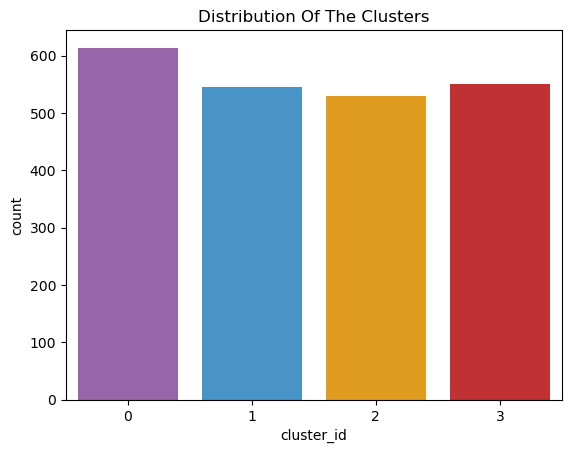

In [72]:
pl = sns.countplot(x=purchase_df_old['cluster_id'], palette= ["#9b59b6", "#3498db", "orange", "#d7191c"])
pl.set_title('Distribution Of The Clusters')
plt.show()

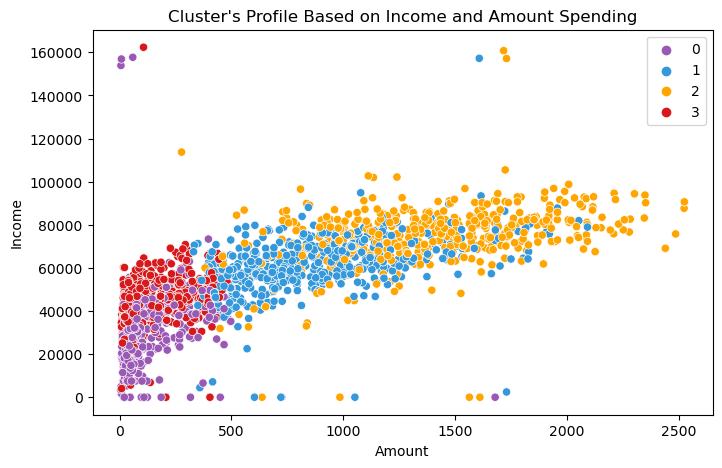

In [73]:
plt.figure(figsize=(8,5))
pl = sns.scatterplot(data=purchase_df_old, x=purchase_df_old['Amount'], y=purchase_df_old['Income'], hue=purchase_df_old['cluster_id'], palette= ["#9b59b6", "#3498db", "orange", "#d7191c"])
pl.set_title("Cluster's Profile Based on Income and Amount Spending")
plt.legend();

### Inferences: Income vs Amount spend.    
Cluster 0: low amount spending & low income.   
Cluster 1: high amount spending & average income.
Cluster 2: high amount spending  & high income.             
Cluster 3: low amount spending & average income.    

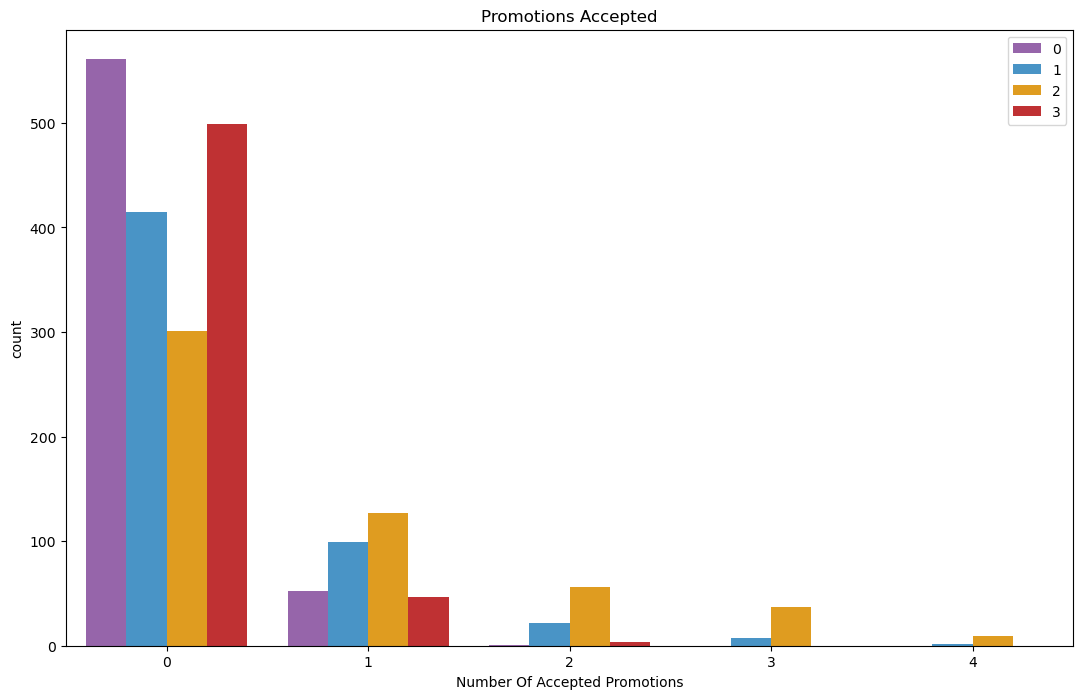

In [74]:
purchase_df_old['Total_Promo'] = purchase_df_old['AcceptedCmp1']+ purchase_df_old['AcceptedCmp2']+ purchase_df_old['AcceptedCmp3']+ purchase_df_old['AcceptedCmp4']+ purchase_df_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=purchase_df_old['Total_Promo'], hue=purchase_df_old['cluster_id'], palette= ["#9b59b6", "#3498db", "orange", "#d7191c"])
pl.set_title('Promotions Accepted')
pl.set_xlabel('Number Of Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

### Inferences:
There has not been an overwhelming response to the campaigns so far.Very few participants overall.Perhaps better-targeted and  well-planned campaigns are required to boost sales.

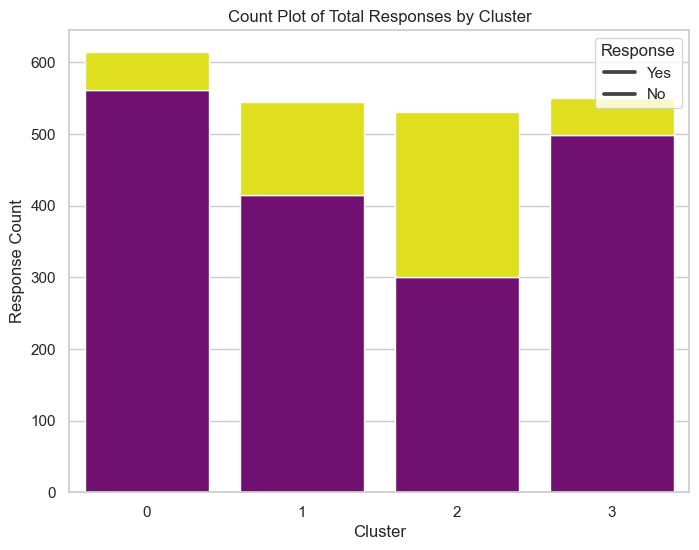

In [75]:
# Group the data by 'cluster_id' and 'Response' and calculate the count for each combination
cluster_response_counts = purchase_df_old.groupby(['cluster_id', 'Response']).size().unstack(fill_value=0)

# Using Seaborn to create the count plot
sns.set(style="whitegrid")  # Set the plot style (optional)
plt.figure(figsize=(8, 6))

# Plot the count of "0" and "1" responses in each cluster using a stacked bar plot
# Set the palette to give different colors for 'Response' column
sns.barplot(data=cluster_response_counts.reset_index(), x='cluster_id', y=0, color="purple", label='Response 0')
sns.barplot(data=cluster_response_counts.reset_index(), x='cluster_id', y=1, color="yellow", bottom=cluster_response_counts[0], label='Response 1')

plt.xlabel('Cluster')
plt.ylabel('Response Count')
plt.title('Count Plot of Total Responses by Cluster')
plt.legend(title='Response', labels=['Yes', 'No'], loc='upper right') 
plt.xticks(rotation=0)
plt.show()

### Inferences:
from the above plot it is very clear that Highest response to campaigns received from customers from Cluster 2 and then from cluster 1 .This customer segment present targeting opportunities for marketing or business strategies. 

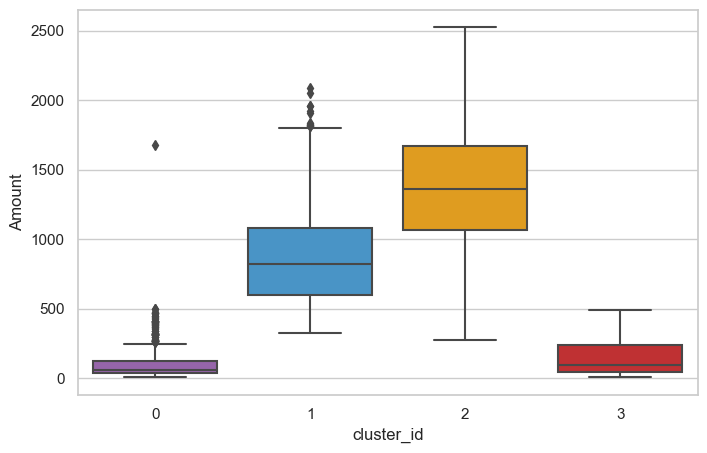

In [76]:
plt.figure(figsize=(8,5))
pl = sns.boxplot(x=purchase_df_old['cluster_id'], y=purchase_df_old['Amount'], palette=["#9b59b6", "#3498db", "orange", "#d7191c"])
plt.show();

### Inferences:
From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers followed by cluster 1 in terms of spending amount.We can explore what each cluster is spending on for the targeted marketing strategies.

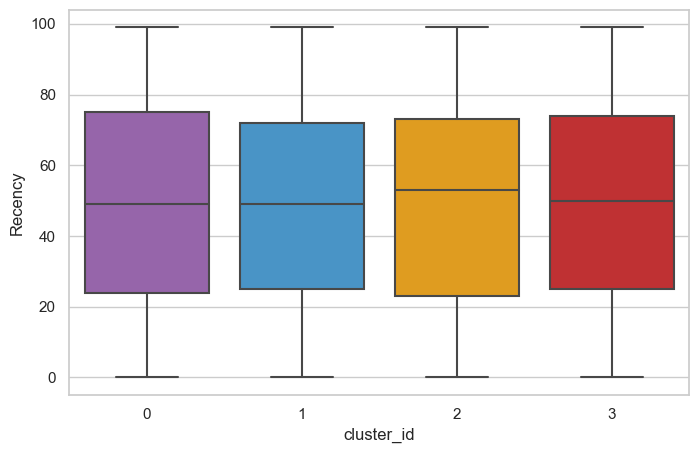

In [77]:
plt.figure(figsize=(8,5))
pl = sns.boxplot(x=purchase_df_old['cluster_id'], y=purchase_df_old['Recency'], palette=["#9b59b6", "#3498db", "orange", "#d7191c"])
plt.show();

### Inferences:
From the above plot, it can be clearly seen that cluster 2 our biggest set of customers in terms of recency.

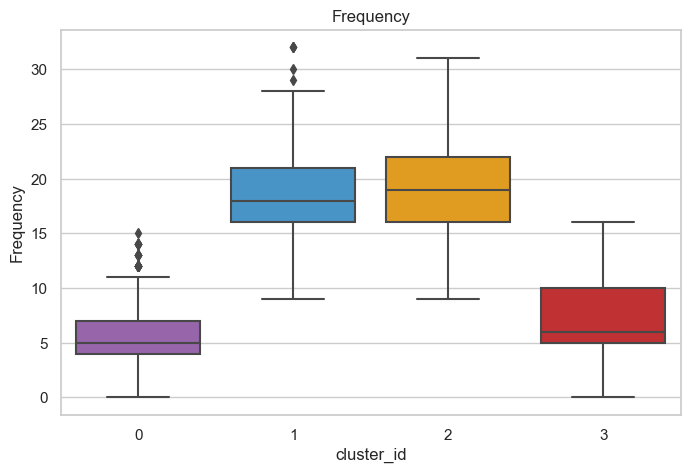

In [78]:
# Plotting the number of purchase.
plt.figure(figsize=(8,5))
pl=sns.boxplot(y=purchase_df_old['Frequency'],x=purchase_df_old['cluster_id'], palette=["#9b59b6", "#3498db", "orange", "#d7191c"])
pl.set_title('Frequency');

### Inferences:
From the above plot, it can be clearly seen that Cluster 2 and then Cluster 1 our biggest set of customers in terms of number of purchases.

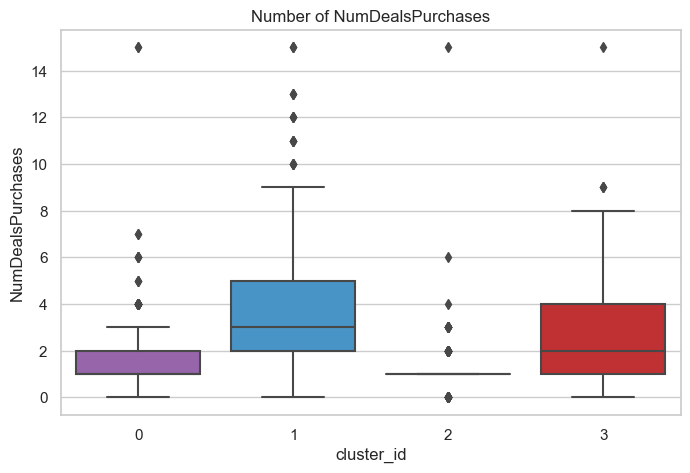

In [79]:
# Plotting the number of deals purchased.
plt.figure(figsize=(8,5))
pl=sns.boxplot(y=purchase_df_old['NumDealsPurchases'],x=purchase_df_old['cluster_id'], palette=["#9b59b6", "#3498db", "orange", "#d7191c"])
pl.set_title('Number of NumDealsPurchases');

### Inferences:
Unlike response to campaigns, the deals offered did well. It has best outcome with cluster 1 . However, our star customers cluster 2 are not much into the deals.

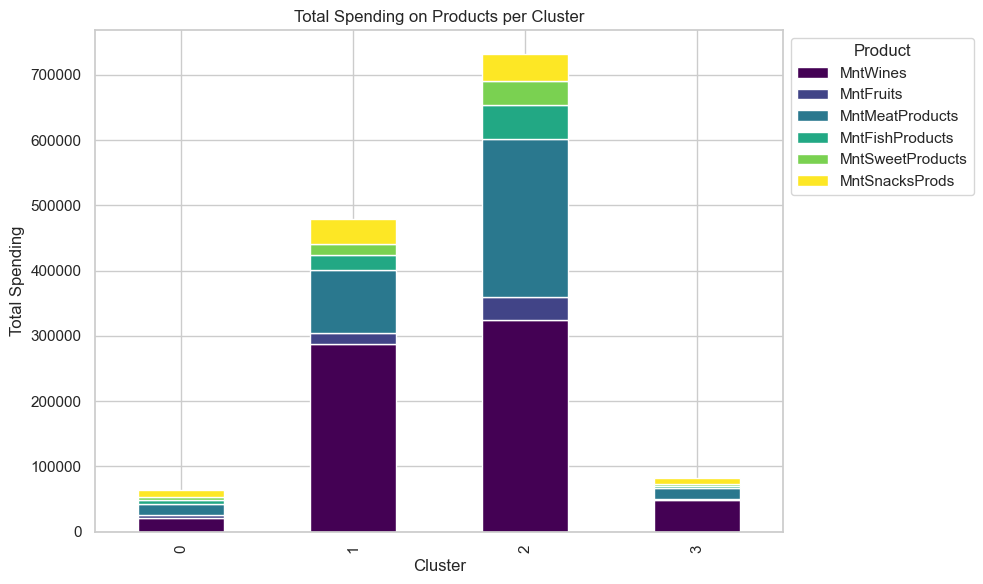

In [80]:
# Total Spending on Products per Cluster:

# Create a subset DataFrame containing the relevant features and cluster information
product_data= purchase_df_old[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntSnacksProds', 'cluster_id']]

# Group the data by cluster
cluster_sum = product_data.groupby('cluster_id').sum().reset_index()

# Set the cluster column as the index
cluster_sum.set_index('cluster_id', inplace=True)

# Create plot
plt.figure(figsize=(10, 6))
cluster_sum.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.title('Total Spending on Products per Cluster')
plt.legend(title='Product', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<Figure size 1300x800 with 0 Axes>

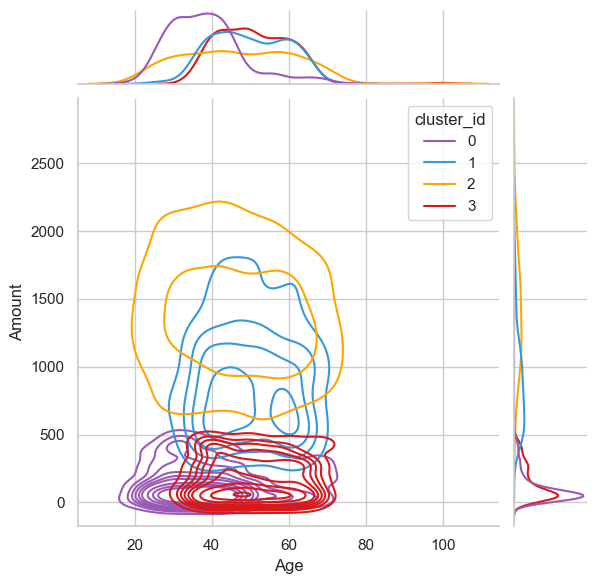

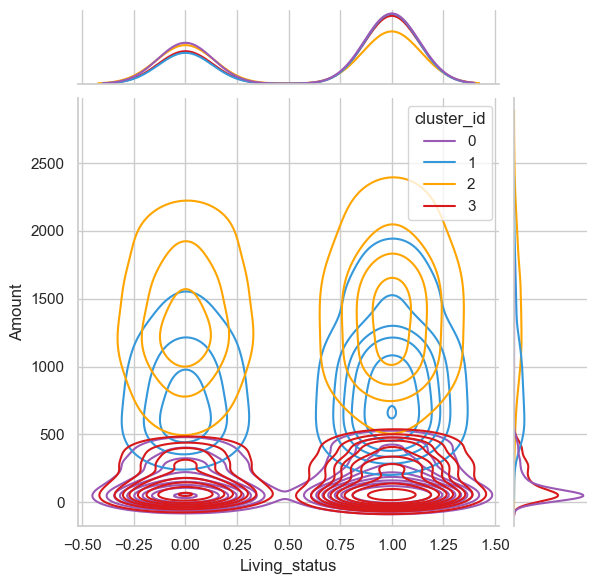

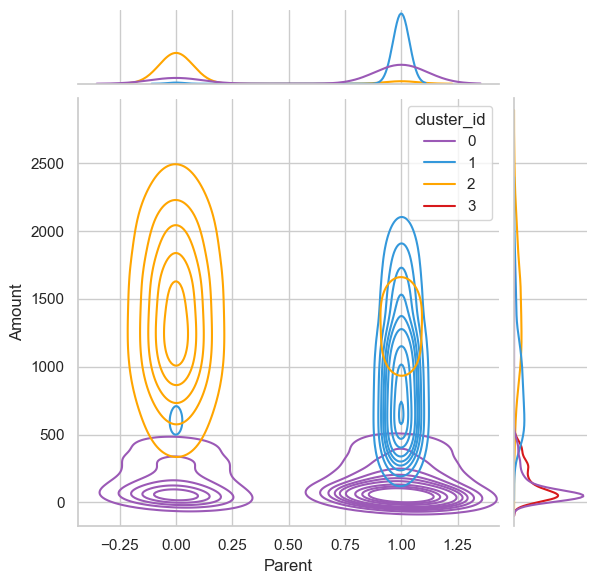

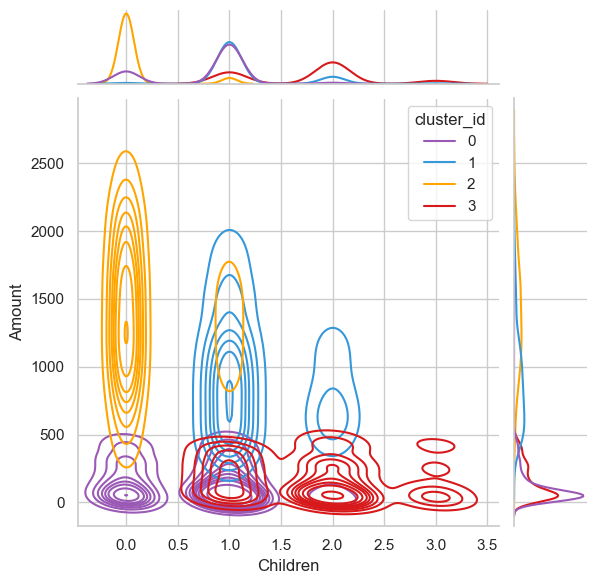

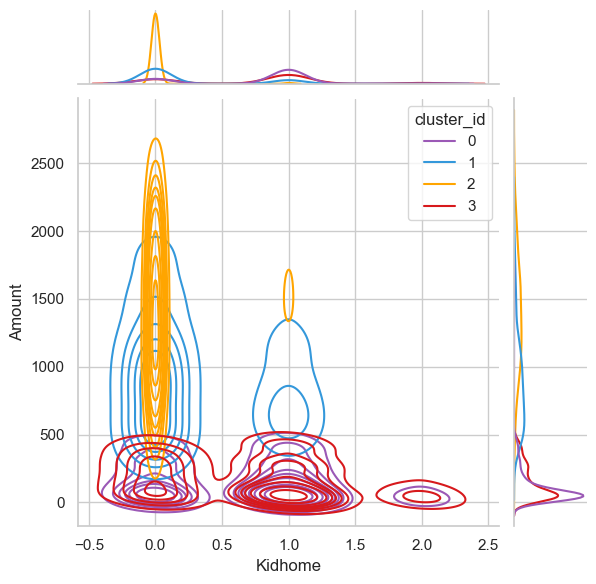

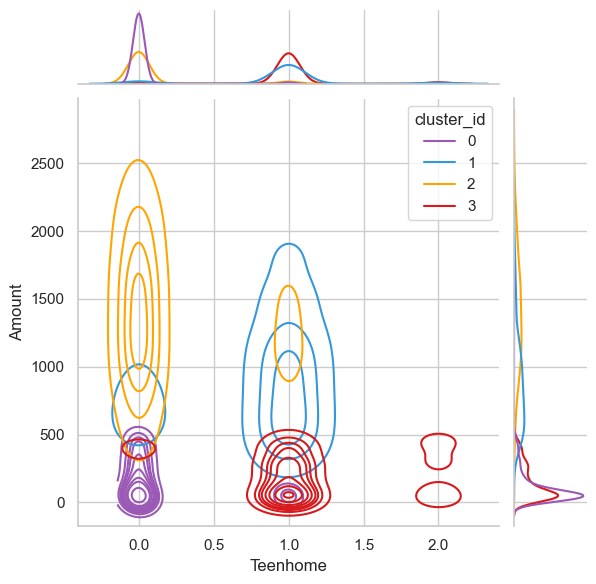

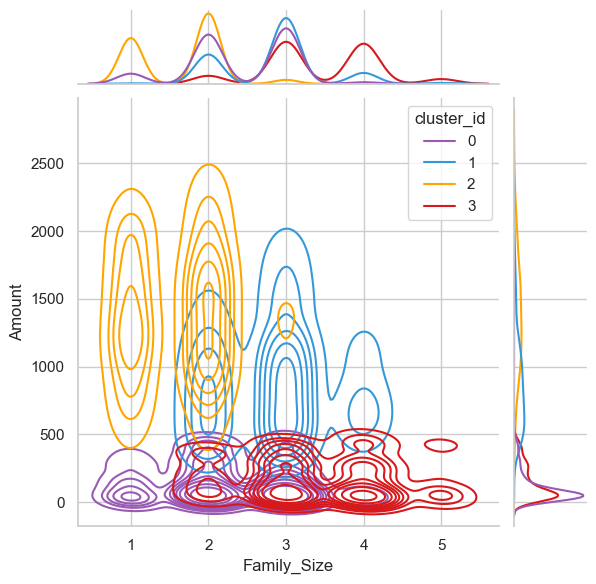

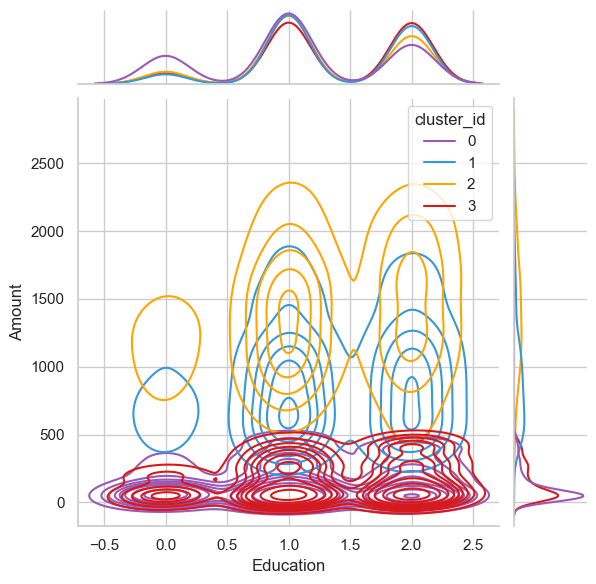

In [81]:
# Cluster analysis based on other Demographic features.
plt.figure(figsize=(13,8))
Personal = ['Age', 'Living_status','Parent','Children','Kidhome','Teenhome', 'Family_Size', 'Education']
for i in Personal:
    g=sns.jointplot(x=purchase_df_old[i], y=purchase_df_old['Amount'], hue=purchase_df_old['cluster_id'],kind='kde', palette=["#9b59b6", "#3498db", "orange", "#d7191c"])
    g.ax_joint.grid(True)


### Inferences:

#### Cluster 0:
i.The majority of individuals in this cluster are parents.   
ii.Families in this cluster typically consist of a maximum of three members.  
iii.They predominantly have one child and tend to have older children rather than teenagers.  
iv.This cluster comprises relatively younger customers.
#### Cluster 1:
i. All individuals in this cluster are parents.   
ii. Families in this cluster typically consist of a minimum of two members and a maximum of four.  
iii. A significant proportion of families in this group have teenagers at home.   
iv. Some individuals in this cluster are single parents.  
v. Customers in this cluster tend to be relatively older.  
#### Cluster 2:
i. None of the individuals in this cluster are parents.  
ii. Most families in this cluster consist of only two members.  
iii.There is a slight majority of couples compared to single individuals.  
iv. The age range of customers in this cluster varies widely.  
v. Customers in this cluster have relatively higher incomes and spending habits.  
#### Cluster 3:
i. All individuals in this cluster are parents.  
ii.Families in this cluster typically consist of a minimum of two members and a maximum of five.  
iii.The majority of families in this cluster have teenagers at home.  
iv. Customers in this cluster tend to be relatively older.  
